<a href="https://colab.research.google.com/github/annaliese-estes/techxchange-lab-2024/blob/main/Qiskit_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Qiskit Runtime Lab

Instructors:  
Annaliese Estes  
James Weaver

Email:  
annaliese.estes@ibm.com  
james.weaver@ibm.com

# Magic 8 Ball

Here, we will build a Magic 8 Ball program that randomly returns 1 of 8 possible responses. How do we use quantum computing to generate a random number? Computational space scales exponentially in quantum computing. Thus, if we need a random result out of 8 possibilities, our program needs to take a measurement of a quantum state vector that consists of 8 basis states, which represent the computational space of 3 qubits in an equal superposition.



In [ ]:
# install Qiskit with visualization

!pip install qiskit[visualization]

In [2]:
# install additional packages

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.primitives import StatevectorSampler
import math
import matplotlib.pyplot as plt

In [3]:
# define Magic 8 Ball responses

responses = ["Yes", "Not today", "Definitely", "Try again", "Signs point to yes", "Not likely", "Sure thing!", "Outlook not so good"]

## Qiskit Patterns: Map problem to quantum circuits

We can think of this step as mapping our problem to be run on a quantum computer. This step needs to be done for any quantum computation, because our instinct is to think of problems in a classical way, while quantum computers work differently.

Problem:
I need a program to generate a random number out of 8.

Mapping to a classical computer: generate a random integer in range(1,9)

Mapping to a quantum computer: put 3 qubits into an equal superposition, which creates a quantum state vector with 8 basis states, each with an equal probability of being the result of a measurement

Because we aren't running on real hardware in this case, we won't be following the rest of the steps in [Qiskit Patterns](https://docs.quantum.ibm.com/guides/intro-to-patterns). However, later in this lab, we will introduce the final 3 steps: optimization, execution, and post-processing.

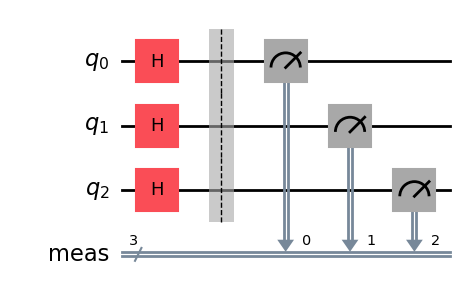

In [4]:
# set up a Quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# place a Hadamard gate on qubits 0, 1, and 2
qc.h(0)
qc.h(1)
qc.h(2)

# add a measurement to your circuit
qc.measure_all()

# visualize your circuit before running it
qc.draw("mpl")

In [5]:
# invoke the Sampler, run our circuit 1024 times to prove equal superposition, and display resulting measurements

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'100': 123, '111': 135, '101': 129, '000': 133, '011': 134, '110': 122, '001': 120, '010': 128}


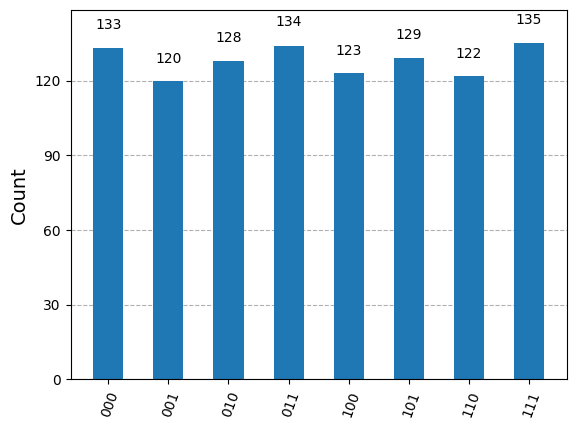

In [6]:
# plot your results
plot_histogram(counts_sampler)

In [11]:
# invoke the Sampler, run our circuit once to get a result for the Magic 8 Ball, and display resulting measurement

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'000': 1}


In [12]:
# accessing the first key of the dict item containing our results
first_key = list(counts_sampler.keys())[0]

# turning that string into an integer
# result is given in base 2, so we need to communicate that because the int() function assumes base 10 as default
integer_value = int(first_key, 2)

# returns our Magic 8 Ball response
print(responses[integer_value])

Yes


### Expanding on the Magic 8 Ball

increasing likelihood of positive or negative responses

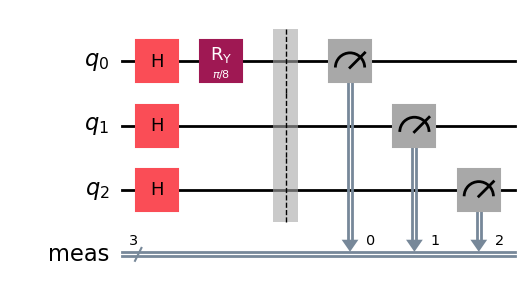

In [13]:
# set up a Quantum circuit with 3 qubits
qc_weighted = QuantumCircuit(3)

# place a Hadamard gate on qubits 0, 1, and 2
qc_weighted.h(0)
qc_weighted.h(1)
qc_weighted.h(2)

# weight the likelihood of certain outcomes by using an Ry gate
qc_weighted.ry(math.pi / 8, 0)

# add a measurement to your circuit
qc_weighted.measure_all()

# visualize the circuit before running it
qc_weighted.draw("mpl")

In [14]:
# invoke the Sampler, run your circuit 1024 times to prove weighted superposition, and display resulting measurements

sampler = StatevectorSampler()
pub = (qc_weighted)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'011': 186, '010': 72, '000': 92, '001': 188, '111': 164, '100': 89, '101': 160, '110': 73}


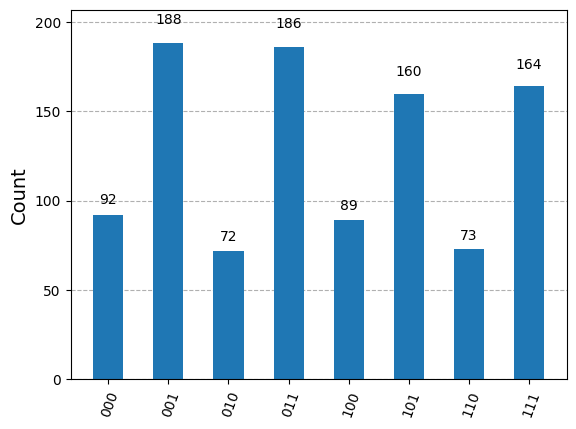

In [15]:
# plot your results
plot_histogram(counts_sampler)

In [16]:
# invoke the Sampler, run your circuit once to get a result for the Magic 8 Ball, and display resulting measurement

sampler = StatevectorSampler()
pub = (qc_weighted)
job_sampler = sampler.run([pub], shots=1)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'111': 1}


In [17]:
# accessing the first key of the dict item containing our results
first_key = list(counts_sampler.keys())[0]

# turning that string into an integer
# result is given in base 2, so we need to communicate that because the int() function assumes base 10 as default
integer_value = int(first_key, 2)

# returns our Magic 8 Ball response
print(responses[integer_value])

Outlook not so good


### Developing your own program using the StatevectorSampler

Now it's time to get your hands dirty with Python and Qiskit code. Your initial assignment, should you choose to accept it, will be to develop a program that samples one chocolate candy from a box that contains two pieces. The circuit that chooses a chocolate utilizes a singlet Bell state.

Bell circuits are specific circuits which generate Bell states, or EPR pairs, a form of entangled and normalized basis vectors. In other words, they are the circuits we use to generate entangled states, a key ingredient in quantum computations.

There exist 4 different Bell states. You can learn about each from the [Basics of Quantum Information page.](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#bell-states)

Your Task: please build a circuit that generates the  |𝜓−⟩  Bell state.


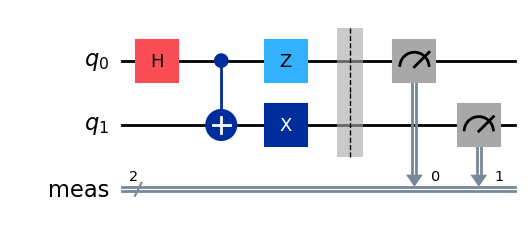

In [18]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

bell = QuantumCircuit(2)

bell.h(0)
bell.cx(0, 1)
bell.z(0)
bell.x(1)
bell.measure_all()

bell.draw("mpl")

In [19]:
# Invoke the Sampler and display the results

sampler = StatevectorSampler()
pub = (bell)
job_sampler = sampler.run([pub], shots=1000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 504, '10': 496}


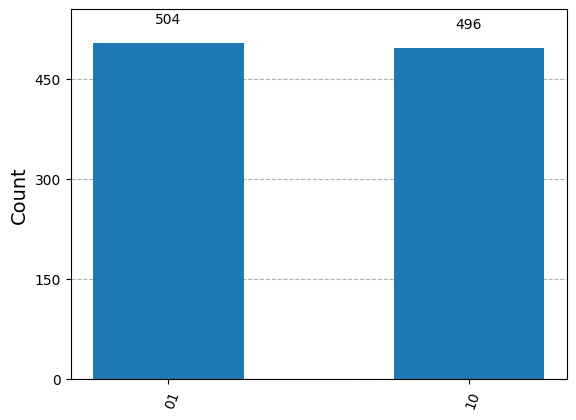

In [20]:
plot_histogram(counts_sampler)

For an additional challenge, please develop a program that samples one chocolate candy from a box that contains three pieces. The circuit that chooses a chocolate utilizes a W-state, in this case consisting of three qubits.

Next, we will develop a slightly more complicated circuit. Similarly to Bell states circuit producing Bell states, W-state circuits produce W states. Although Bell states entangle two qubits, W-states entangle three qubits. We will provide some specifics of the operation for today. If you are interested in learning more about W-states, check out this [Wikipedia article.](https://en.wikipedia.org/wiki/W_state)

To build our W-state, we will follow 6 simple steps:
- Initialize our 3 qubit circuit
- Perform an Ry rotation on our qubit. The specifics of this operation are provided.
- Perform a controlled hadamard gate on qubit 1, with control qubit 0
- Add a CNOT gate with control qubit 1 and target qubit 2
- Add a CNOT gate with control qubit 0 and target qubit 1
- Add a X gate on qubit 0

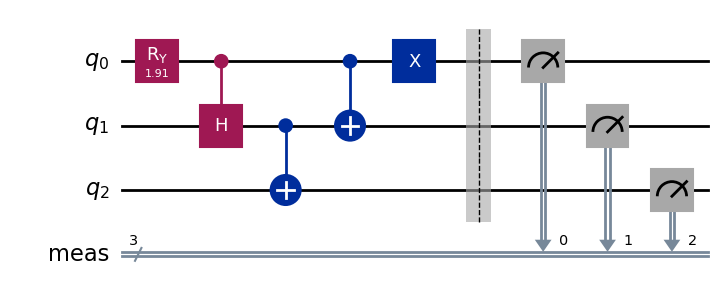

In [21]:
# Let's create and draw a W-state circuit

wstate = QuantumCircuit(3)

wstate.ry(1.91063324, 0)

# below is filled in for purposes of testing the lab, on the day of we will have them fill this in themselves

wstate.ch(0, 1)
wstate.cx(1, 2)
wstate.cx(0, 1)
wstate.x(0)
wstate.measure_all()

wstate.draw("mpl")

In [22]:
# Invoke the Sampler and display results

sampler = StatevectorSampler()
pub = (wstate)
job_sampler = sampler.run([pub], shots=1000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'010': 338, '001': 330, '100': 332}


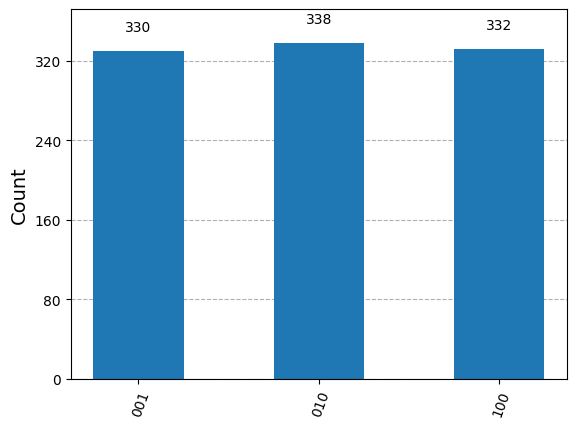

In [23]:
plot_histogram(counts_sampler)